# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [2]:
df = pd.read_csv("nse_sensex.csv")
df = df.round(2)
df.head()

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,ASIANPAINT,EQ,883.55,882.0,885.60,876.9,879.7,878.75,880.60,294006,2.589019e+13,7988,149531,0.51
1,2016-01-04,ASIANPAINT,EQ,878.75,876.2,892.45,871.7,880.5,880.80,881.96,709103,6.254040e+13,28981,337383,0.48
2,2016-01-05,ASIANPAINT,EQ,880.80,881.3,905.00,881.3,901.4,900.65,898.75,1372748,1.233761e+14,52028,533231,0.39
3,2016-01-06,ASIANPAINT,EQ,900.65,904.5,911.90,884.0,885.3,886.40,897.11,1716479,1.539873e+14,51374,1008881,0.59
4,2016-01-07,ASIANPAINT,EQ,886.40,883.0,891.55,869.0,871.1,872.35,878.39,990333,8.698976e+13,26249,477288,0.48


In [3]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40292 entries, 0 to 40291
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                40292 non-null  object 
 1   SYMBOL              40292 non-null  object 
 2   SERIES              40292 non-null  object 
 3   PREV CLOSE          40292 non-null  float64
 4   OPEN                40292 non-null  float64
 5   HIGH                40292 non-null  float64
 6   LOW                 40292 non-null  float64
 7   LAST                40292 non-null  float64
 8   CLOSE               40292 non-null  float64
 9   VWAP                40292 non-null  float64
 10  VOLUME              40292 non-null  int64  
 11  TURNOVER            40292 non-null  float64
 12  TRADES              40292 non-null  int64  
 13  DELIVERABLE VOLUME  40292 non-null  int64  
 14  %DELIVERBLE         40292 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 4.6+

In [4]:
# Number of companies and name of the companies.
print(f'No of companies in Sensex : {df.SYMBOL.nunique()}')
print(f'Name of companies in Sensex :\n {df.SYMBOL.unique()}')

No of companies in Sensex : 30
Name of companies in Sensex :
 ['ASIANPAINT' 'AXISBANK' 'BAJAJ-AUTO' 'BAJFINANCE' 'BHARTIARTL' 'HCLTECH'
 'HDFC' 'HDFCBANK' 'HEROMOTOCO' 'HINDUNILVR' 'ICICIBANK' 'INDUSINDBK'
 'INFY' 'ITC' 'KOTAKBANK' 'LT' 'M&M' 'MARUTI' 'NESTLEIND' 'NTPC' 'ONGC'
 'POWERGRID' 'RELIANCE' 'SBIN' 'SUNPHARMA' 'TATASTEEL' 'TCS' 'TECHM'
 'TITAN' 'ULTRACEMCO']


In [5]:
# Mean of the trading data
data = df.groupby('SYMBOL').mean()
data.sort_values(by = 'HIGH', ascending=False,)
data = data.round(2)
data

/var/folders/ds/v3ns8p3s2hs70n834rjn5z2r0000gn/T/ipykernel_24095/342565596.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby('SYMBOL').mean()


,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
SYMBOL,,,,,,,,,,,,
ASIANPAINT,1469.39,1472.04,1488.56,1454.67,1471.52,1471.40,1471.38,1396931.15,2.291962e+14,57750.88,620378.21,0.48
AXISBANK,572.73,573.44,581.35,564.74,572.95,572.95,573.10,13291824.69,7.263826e+14,158760.96,5196476.02,0.44
BAJAJ-AUTO,2923.55,2927.00,2961.11,2890.99,2924.71,2924.74,2926.29,494348.82,1.472345e+14,31547.93,172779.67,0.40
BAJFINANCE,3380.79,3381.64,3434.07,3324.23,3381.25,3380.90,3380.71,2357541.58,7.170489e+14,103745.90,535235.03,0.33
BHARTIARTL,407.55,408.14,414.32,401.31,407.76,407.70,407.76,9787844.93,4.456544e+14,104430.41,4215269.14,0.46
HCLTECH,870.38,871.18,881.58,859.92,870.46,870.47,870.72,3152024.50,2.629791e+14,82636.36,1566010.38,0.57
HDFC,1821.81,1823.94,1844.08,1801.23,1822.59,1822.76,1822.36,3475334.12,6.440838e+14,129091.58,2168609.58,0.64
HDFCBANK,1567.54,1568.37,1581.54,1553.63,1568.02,1567.84,1567.71,5230088.12,7.107428e+14,119823.33,2624982.21,0.56
HEROMOTOCO,3046.07,3051.10,3086.22,3009.80,3045.83,3046.30,3048.41,738105.09,2.115431e+14,47119.27,287095.58,0.46


In [6]:
# Top 10 Trading companies from 2016 to 2021
df_top10 = pd.DataFrame(data.nlargest(10,'TRADES')['TRADES'].sort_values(ascending = True))
df_top10

,TRADES
SYMBOL,
INDUSINDBK,116015.02
TATASTEEL,117246.24
ITC,117449.38
HDFCBANK,119823.33
HDFC,129091.58
INFY,147433.48
AXISBANK,158760.96
ICICIBANK,173131.17
SBIN,192874.59


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

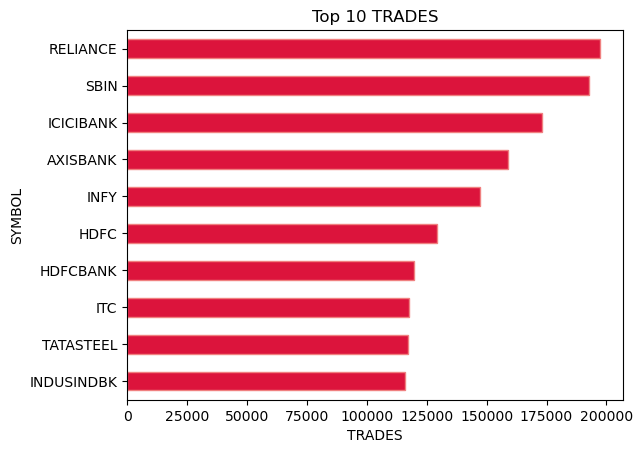

In [7]:
# Visualize Top 10 Trades from 2016 to 2021
df_top10 = pd.DataFrame(data.nlargest(10,'TRADES')['TRADES'].sort_values(ascending = True))
df_top10.plot.barh(legend = False, color = 'crimson', edgecolor = 'lightcoral')
plt.title('Top 10 TRADES',color = 'black')
plt.xlabel('TRADES',color = 'black')
plt.ylabel('SYMBOL',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('bar_horizontal.png')

plt.show()


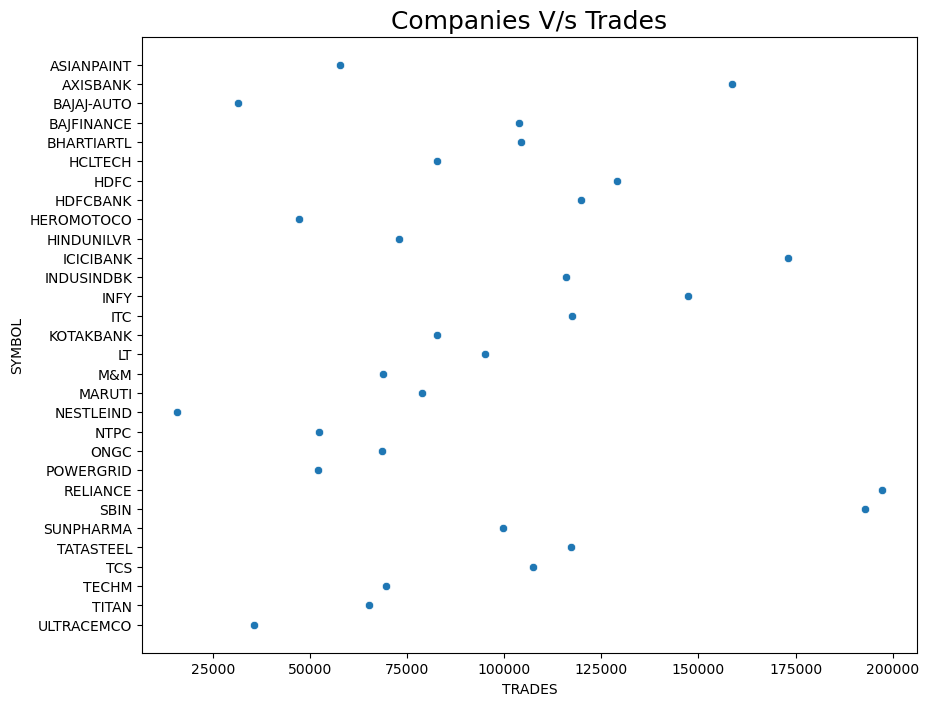

In [8]:
#scatter plot comparing companies and Trades
import seaborn as sb
plt.figure(figsize=(10,8))
sb.scatterplot(x = 'TRADES', y = 'SYMBOL', data = data)
plt.title('Companies V/s Trades', color = 'black', fontsize = 18)
plt.savefig('scatter.png')

plt.show()

<Axes: xlabel='SYMBOL'>

<Figure size 1500x1000 with 0 Axes>

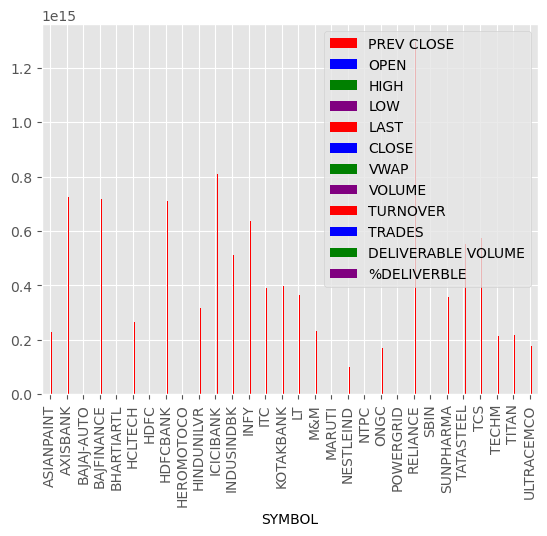

In [9]:
style.use('ggplot')
plt.figure(figsize=(15,10))
# barwidth = 0.2
df_tot = pd.DataFrame(data)
df_tot.rename(columns = {0:'DELIVERABLE VOLUME'}, inplace = True)
color = 'Red','Blue','Green','Purple'
df_tot.plot(kind = 'bar',color = color, legend = True)

Percentage difference used to check difference between current row and previous row.

In [10]:
#used Percentage difference between current row and previous row.
df_REL = df[df.SYMBOL=='RELIANCE'][['DATE','CLOSE']]
df_REL = df_REL.groupby(df_REL.DATE).agg({"CLOSE":"sum"})
df_REL['pct'] = df_REL.pct_change() 
df_REL.head()

,CLOSE,pct
DATE,,
2016-01-01,1015.35,NaN
2016-01-04,995.30,-0.019747
2016-01-05,1005.15,0.009897
2016-01-06,1032.20,0.026911
2016-01-07,1013.25,-0.018359


<Axes: xlabel='DATE'>

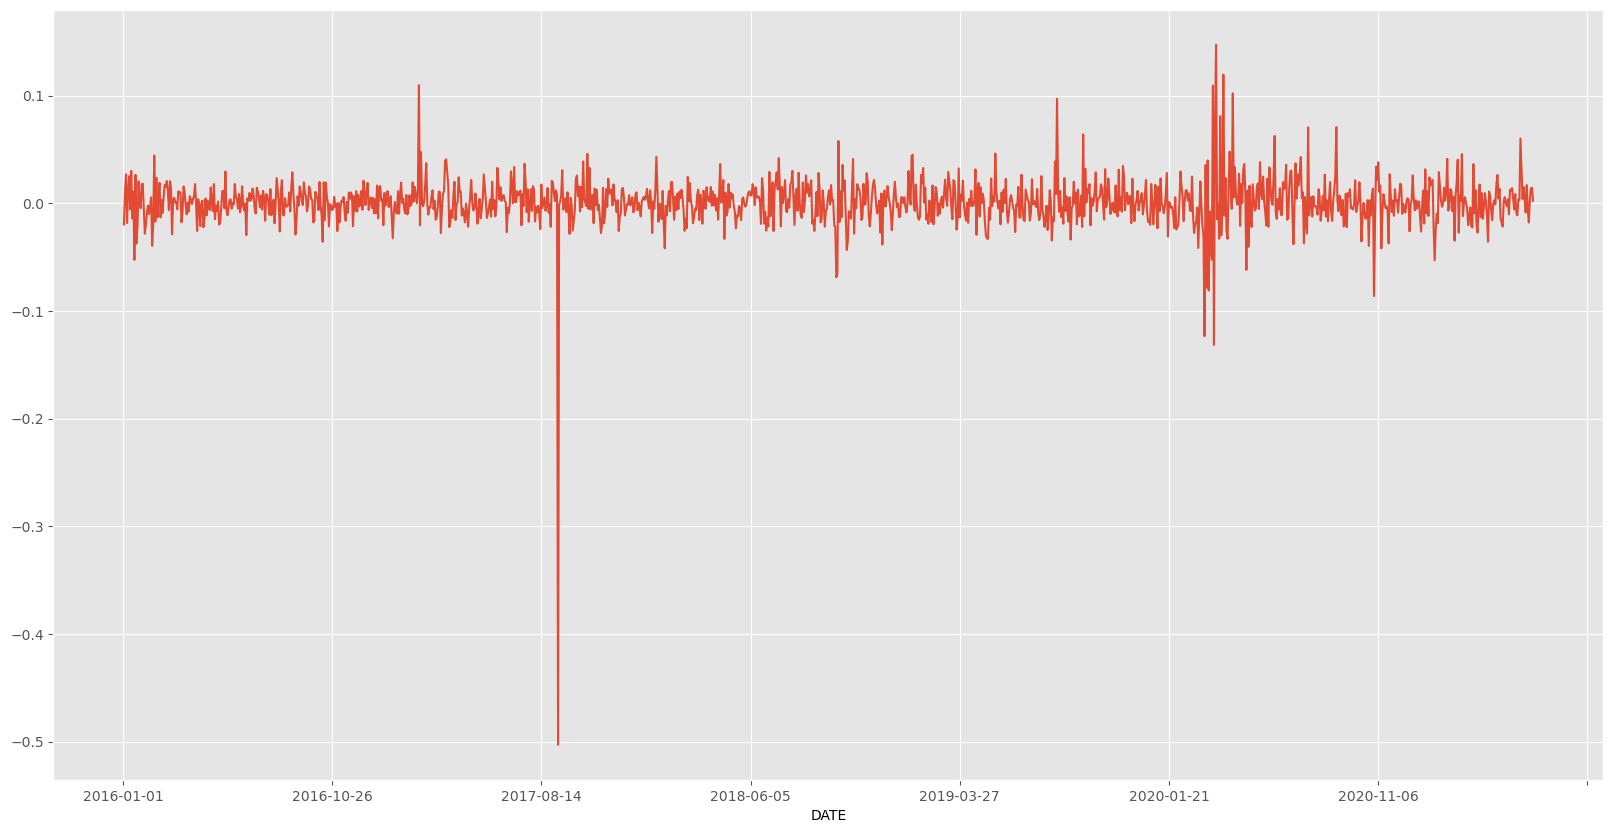

In [11]:
plt.figure(figsize=(20,10))
           
df_REL['pct'].plot()

In [12]:
# We can check the outliers in each comapy with this code.
df_temp = df[df.SYMBOL=='ASIANPAINT'][['DATE','CLOSE']]
df_temp = df_temp.groupby(df_temp.DATE).agg({"CLOSE":"sum"})
df_temp['pct'] = df_temp.pct_change() 
df_temp.head()

,CLOSE,pct
DATE,,
2016-01-01,878.75,NaN
2016-01-04,880.80,0.002333
2016-01-05,900.65,0.022536
2016-01-06,886.40,-0.015822
2016-01-07,872.35,-0.015851


<Axes: xlabel='DATE'>

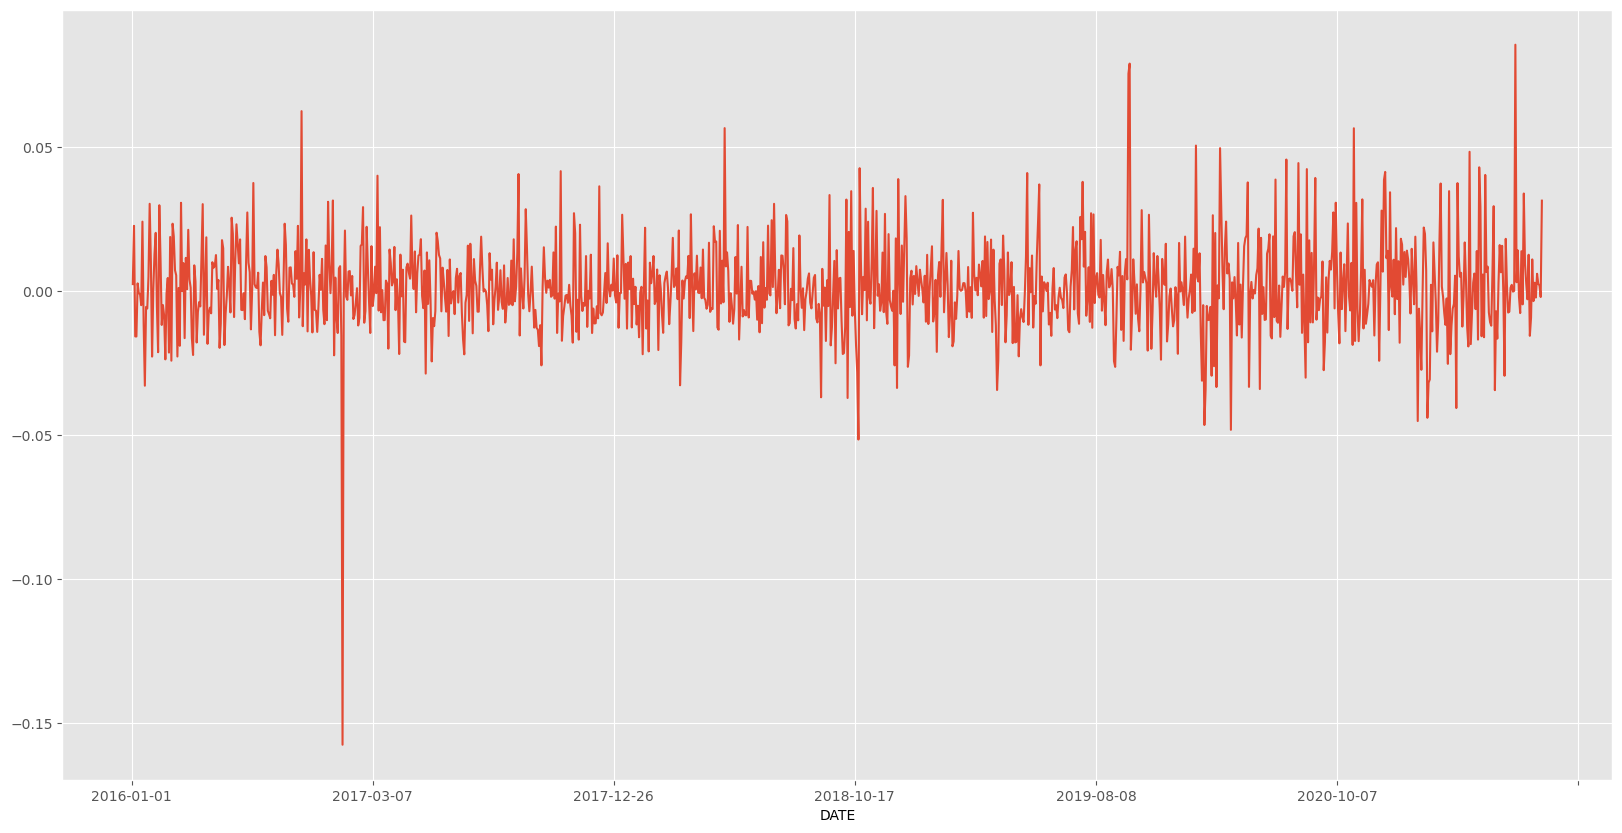

In [13]:
plt.figure(figsize=(20,10))
           
df_temp['pct'].plot()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? - Stock market's graph is never sam
2. Do you have any concerns about your dataset?  - Turnover values are too big need to convert.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? - Turnover values need to be convert.